
Lat:
Mean = 47.000
Median = 52.300
Standard Deviation = 21.090


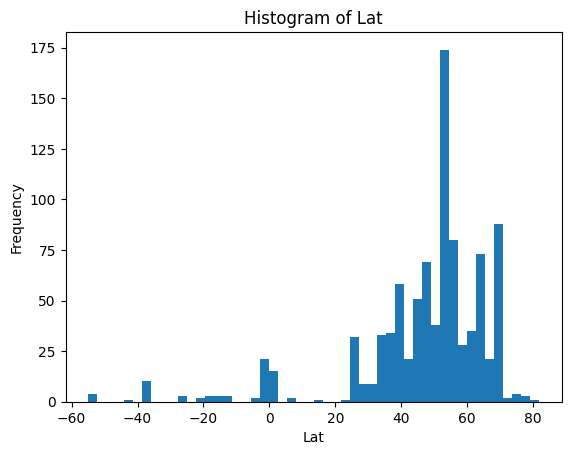


Lon:
Mean = -2.789
Median = 8.610
Standard Deviation = 84.504


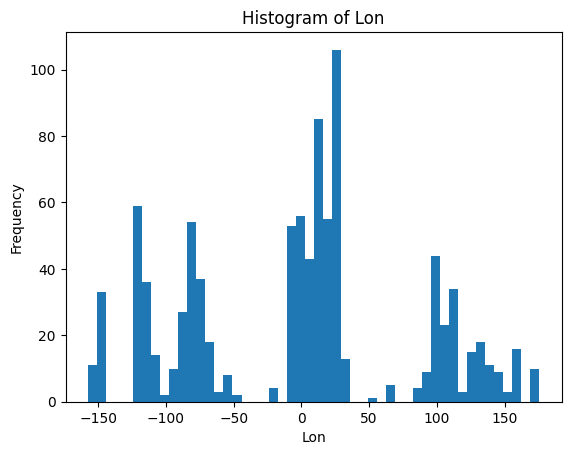


Annual NEE (g C m-2 yr-1):
Mean = -56.396
Median = -42.050
Standard Deviation = 192.987


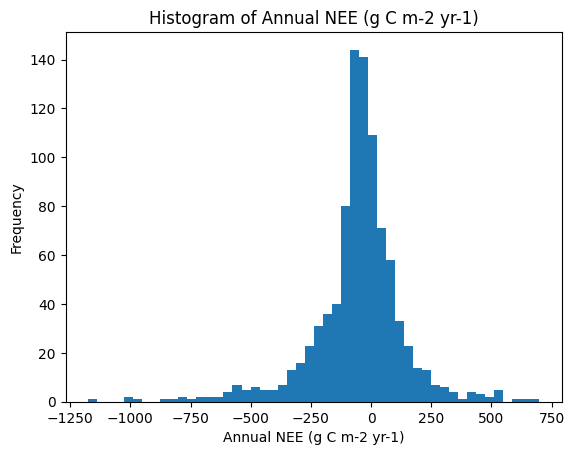

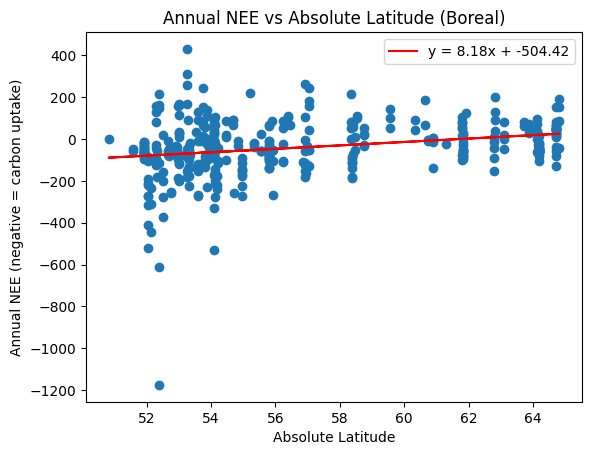

Boreal: Pearson = 0.263, Spearman = 0.289


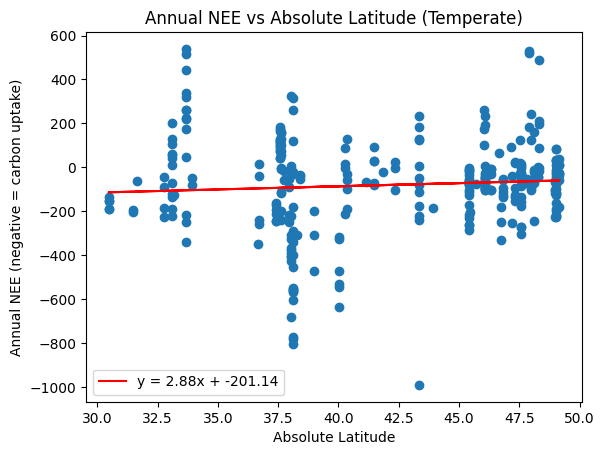

Temperate: Pearson = 0.075, Spearman = 0.054


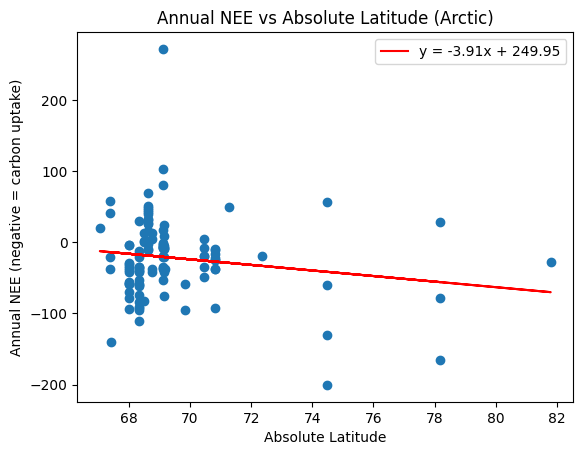

Arctic: Pearson = -0.163, Spearman = 0.089


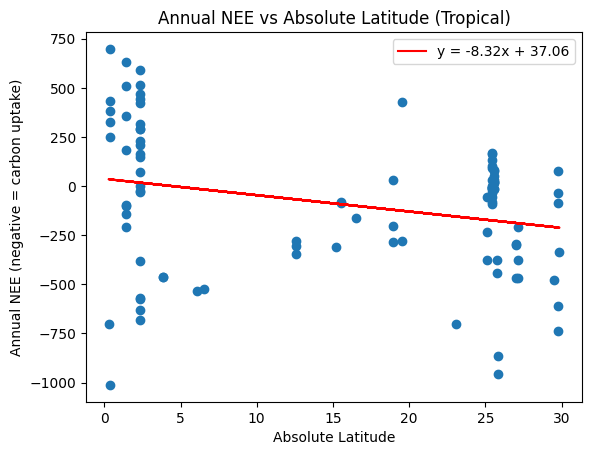

Tropical: Pearson = -0.265, Spearman = -0.317

Tropical shows the strongest correlation with Annual NEE (R^2 = 0.070)

Explained variance (%): [40.62 34.21 25.16]


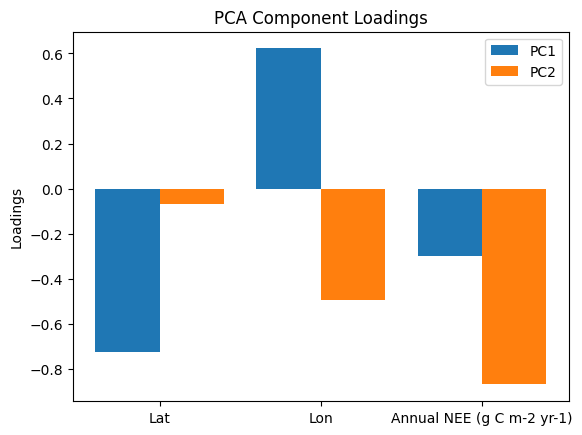

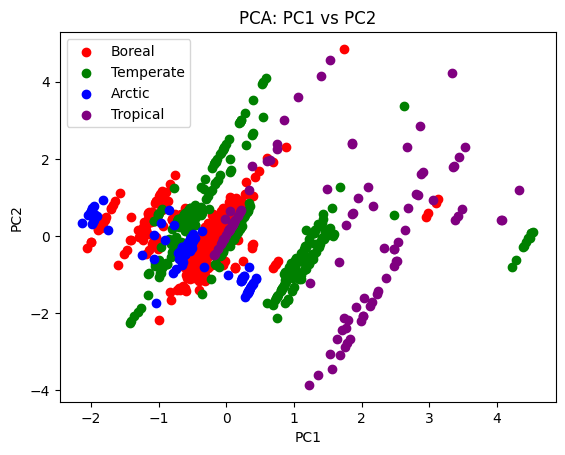

In [1]:
# Hypothesis: Wetlands in cooler, mid- to high-latitude regions will sequester more carbon (shown by more negative NEE values), 
# since slower decomposition helps carbon build up in the soil.

# import the python funtions I need
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read excel file using pandas
df = pd.read_csv("Wetland_NEP.csv")

# P1: Data Descritpion using latitudes, longitudes, and yearly NEE
for var in ["Lat", "Lon", "Annual NEE (g C m-2 yr-1)"]:
    value = df[var]
    
    # looping through and printing summary statistics
    print(f"\n{var}:")
    print(f"Mean = {value.mean():.3f}")
    print(f"Median = {value.median():.3f}")
    print(f"Standard Deviation = {value.std():.3f}")
    
    # looping through and plotting histograms for each variable
    plt.hist(value, bins=50)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


# P2: Correlation between the Climate Zones and NEE
lat_col = "Lat"
nee_col = "Annual NEE (g C m-2 yr-1)"
climate_col = "Climate zone"

# new col for absolute latitude since there is negative and postive data points
df["Abs_Lat"] = df[lat_col].abs()

# identify unique climate zones
climate_zones = df[climate_col].unique()

str_r2 = 0 # setting strongest r^2 to 0 for counting
str_zone = "" #creating place to store zone variables

# looping through our climate zones and running correlation/regression
for zone in climate_zones:
    zone_data = df[df[climate_col] == zone]
    
    x = zone_data["Abs_Lat"] # absolute latitude as x variable
    y = zone_data[nee_col]  # negative NEE to indicate carbon uptake for y variable
    
    # Scatter plot with regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    plt.title(f"Annual NEE vs Absolute Latitude ({zone})")
    plt.xlabel("Absolute Latitude")
    plt.ylabel("Annual NEE (negative = carbon uptake)")
    plt.legend()
    plt.show()
    
    # calculating Pearson and SPearman correlations
    pearson_r = x.corr(y, method="pearson")
    spearman_r = x.corr(y, method="spearman")
    print(f"{zone}: Pearson = {pearson_r:.3f}, Spearman = {spearman_r:.3f}")
    
    # Tracking which climate zone has the strongest R²
    r2 = r_value**2
    if r2 > str_r2:
        str_r2 = r2
        str_zone = zone

print(f"\n{str_zone} shows the strongest correlation with Annual NEE (R^2 = {str_r2:.3f})")

# P3: PCA using all Quantitative Variables
pca_vars = ["Lat", "Lon", "Annual NEE (g C m-2 yr-1)"]
data_pca = df[pca_vars]

# standardizing tvariables since the values are at different scales and PCA wouldnt treat them equally
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# PCA on the scaled data
pca = PCA()
pca.fit(data_scaled)
print("\nExplained variance (%):", (pca.explained_variance_ratio_ * 100).round(2)) # PCA % of varaince by each componet
pca_scores = pca.transform(data_scaled)
pca_loadings = pca.components_

# barchart of PCA componet weights
plt.figure()
x = range(len(pca_vars)) # x varibale for pca based on number of qautitaive varibles, so lon, lat, and NEE
plt.bar([i - 0.2 for i in x], pca_loadings[0], width = 0.4, label="PC1") # PC1 for each x
plt.bar([i + 0.2 for i in x], pca_loadings[1], width = 0.4, label="PC2") # PC2 for each x
plt.xticks(x, pca_vars)
plt.ylabel("Loadings")
plt.title("PCA Component Loadings")
plt.legend()
plt.show()

# PC1 vs PC2 scatter colored by climate zone
plt.figure()
colors = ["red", "green", "blue", "purple", "orange"]  # colors for each zones
for i, zone in enumerate(climate_zones): # Looping through each climate zone and ploting its points
    pca_boo = df[climate_col] == zone # boolean mask for selecting rows of this zone
    plt.scatter(pca_scores[pca_boo, 0], pca_scores[pca_boo, 1], label=zone, color=colors[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2")
plt.legend()
plt.show()
